In [2]:
import pandas as pd                  # for data manipulation
import numpy as np # for mathematical calculations
import warnings 
# to ignore any warnings
warnings.filterwarnings("ignore")
import plotly as plot
import seaborn as sb
import plotly.graph_objs as go
import plotly.express as plote
import matplotlib.pyplot as pplot

In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data.shape

(891, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Types of Columns:
Categorical Columns : Pclass, Sex, Embarked, Survived
Continuous Data Columns: Age, Fare, Sibsp, Parch, PassengerId
Alphanumeric Data Columns: Ticket, Cabin, Name

In [10]:
data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [11]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [12]:
data['Age'].describe()


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [13]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [14]:
data['Age'].isnull().sum()

0

In [15]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}


data['Cabin'].fillna("U0",inplace=True)
data['Deck'] = data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
data['Deck'] = data['Deck'].map(deck)
data['Deck'] = data['Deck'].fillna(0)
data['Deck'] = data['Deck'].astype(int)

#we can now drop the cabin feature

data=data.drop(['Cabin'], axis=1)

In [16]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Deck             int32
dtype: object

In [17]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Deck           0
dtype: int64

In [18]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Deck
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,6.936027
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,2.074282
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,8.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,8.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,8.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,8.000000


There are a total of 891 rows(passengers) in our dataset.
Since the Survived column has dicrete data, the mean gives us that 38% number of people survived in the ship.
Most people belonged to Pclass = 3
The maximum Fare paid is 512 however the fare prices varied a lot as we can see from the standard deviation of 49

male      577
female    314
Name: Sex, dtype: int64

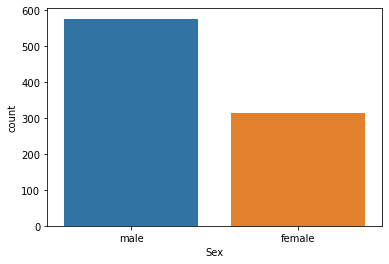

In [19]:
sb.countplot('Sex',data=data)
data['Sex'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

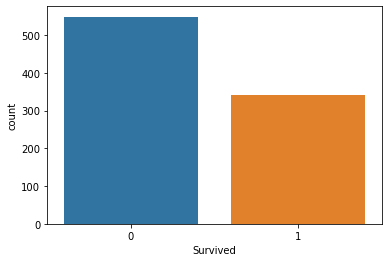

In [20]:
sb.countplot('Survived',data=data)
data['Survived'].value_counts()

,Sex,Survived
0,female,0.742038
1,male,0.188908


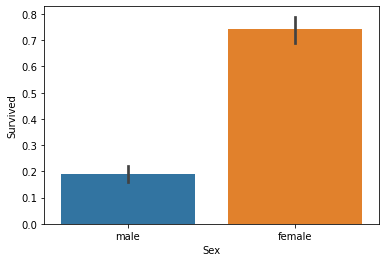

In [21]:
sb.barplot(x='Sex',y='Survived',data=data)
data.groupby('Sex',as_index=False).Survived.mean()

Here the number of female who survived was much more than the males who survived i.e. 74% females as against to 18% males.

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


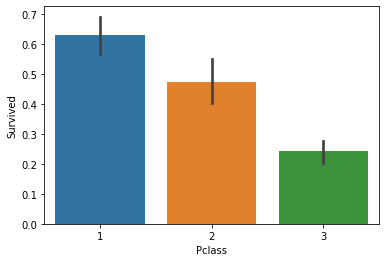

In [22]:
sb.barplot(x='Pclass',y='Survived',data=data)
data[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Deck,Survived
4,4,0.757576
5,5,0.750000
2,2,0.744681
6,6,0.615385
3,3,0.593220
7,7,0.500000
1,1,0.466667
8,8,0.299854
0,0,0.000000


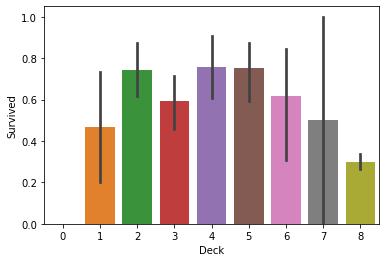

In [23]:
sb.barplot(x='Deck',y='Survived',data=data)
data[["Deck", "Survived"]].groupby(['Deck'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Clearly Class has an impact on survival of each passenger with the percentages of survival being 62.96%, 47.28%, 24.23% for Pclass 1, 2 and 3 respectively. Thus, belonging to Pclass = 1 had a huge advantage.

Deck 2,4 5 has the highest survial percentage.

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


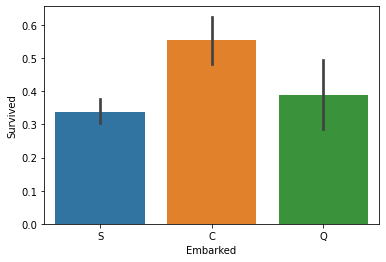

In [24]:
sb.barplot(x='Embarked',y='Survived',data=data)
data[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

The passengers that embarked from port Cherbourg had a higher rate of Survival at 55%.

In [25]:
women =data[data['Sex']=='female']
men = data[data['Sex']=='male']


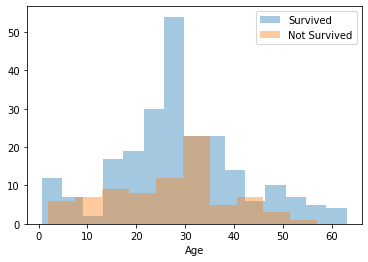

In [26]:
ax = sb.distplot(women[women['Survived']==1].Age.dropna(), label = 'Survived',kde =False)
ax = sb.distplot(women[women['Survived']==0].Age.dropna(),label = 'Not Survived', kde =False)
ax.legend()

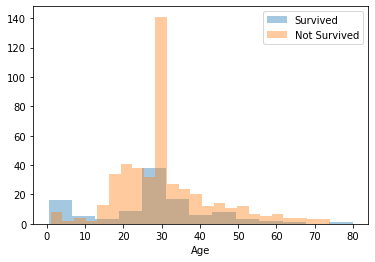

In [27]:
ax = sb.distplot(men[men['Survived']==1].Age.dropna(), label = 'Survived',kde =False)
ax = sb.distplot(men[men['Survived']==0].Age.dropna(),label = 'Not Survived', kde =False)
ax.legend()

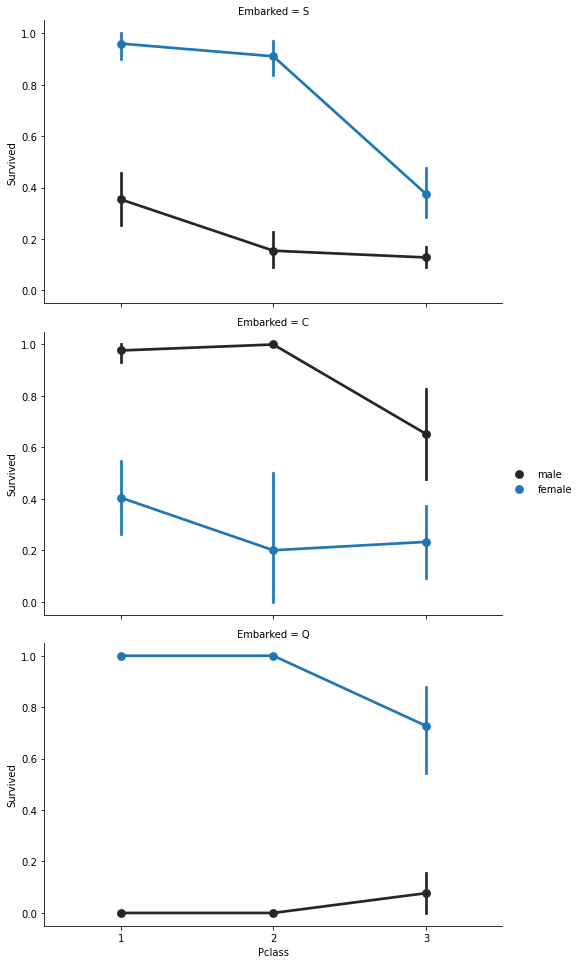

In [28]:
FacetGrid = sb.FacetGrid(data, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sb.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

Embarked seems to be correlated with survival, depending on the gender.

Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port C. Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.

Pclass also seems to be correlated with survival. 

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


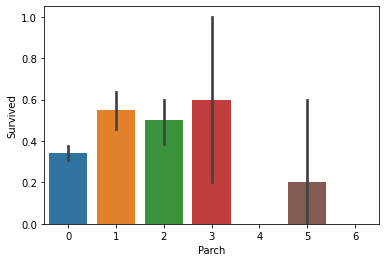

In [29]:
sb.barplot(x='Parch',y='Survived',data=data)
data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

passengers who had either 1, 2 or 3 had a higher possibility of surviving than the ones had none. However having more than 3 made the possibility even lesser. 

<AxesSubplot:xlabel='Sex', ylabel='count'>

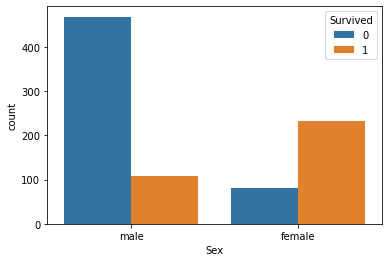

In [30]:
sb.countplot('Sex',hue='Survived',data=data)

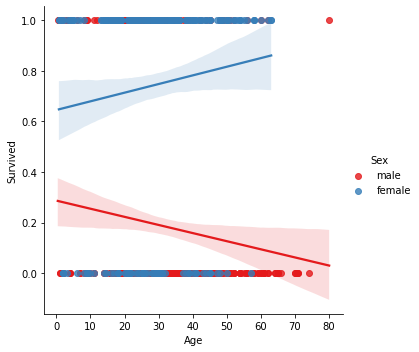

In [31]:
sb.lmplot(x='Age',y='Survived',data=data,hue='Sex',palette='Set1')

We can see that age has an opposite effect on the survival in men and women. The chances of survival increase as the age of women increases.

,Sex,Age
0,female,29.699118
1,male,29.699118


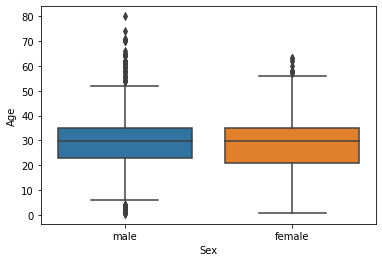

In [32]:
sb.boxplot(x='Sex',y='Age',data=data)

#getting the median age according to Sex
data.groupby('Sex',as_index=False)['Age'].median()

<AxesSubplot:ylabel='Fare'>

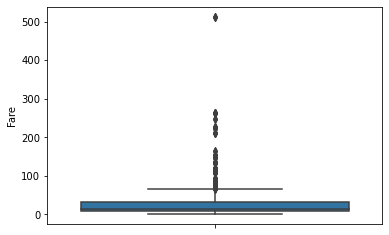

In [34]:
sb.boxplot(y="Fare",data=data)

<AxesSubplot:>

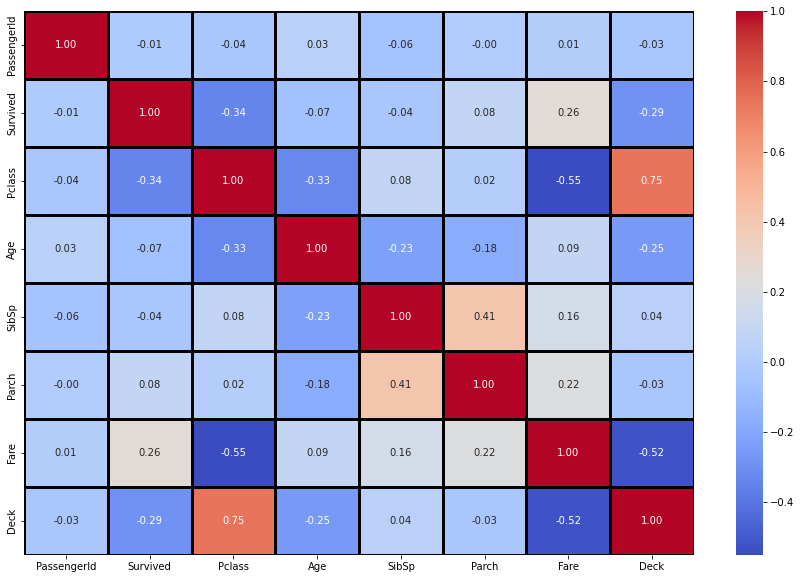

In [36]:
pplot.figure(figsize=(15, 10)) 
sb.heatmap(data.corr(), annot = True, cmap= 'coolwarm', linewidths=3, linecolor='black',fmt="0.2f")

<AxesSubplot:>

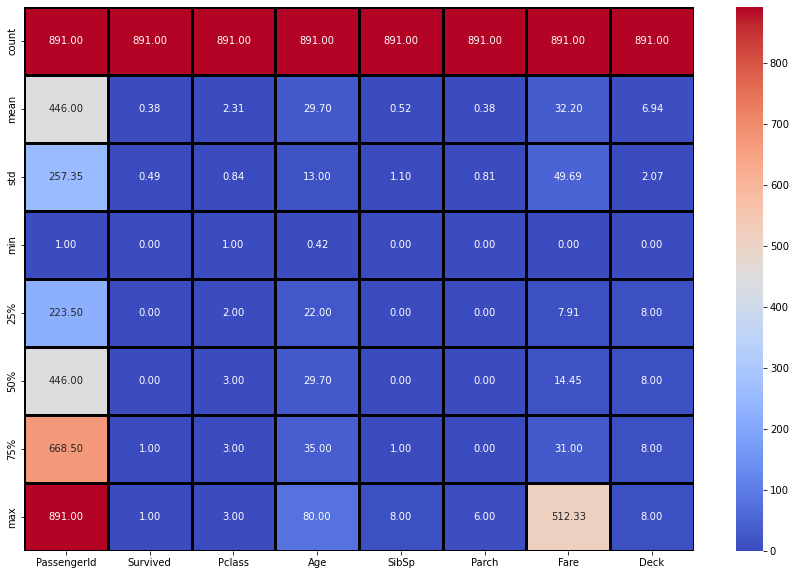

In [37]:
pplot.figure(figsize=(15, 10)) 
sb.heatmap(data.describe(), annot = True, cmap= 'coolwarm', linewidths=3, linecolor='black',fmt="0.2f")

In [38]:
data.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Deck          -1.636758
dtype: float64

In [39]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Deck'],
      dtype='object')

In [40]:
#Dropping of unwanted columns

drop_col=['Ticket','PassengerId']

data = data.drop(drop_col,axis=1)

In [41]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Deck'],
      dtype='object')

In [42]:
#Handling Names

titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
n=len(data['Name'])
for i in range (0,n):
    data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',
                                           'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')


In [43]:
data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [44]:
data.groupby('Title',as_index=False)['Survived'].mean().sort_values(by='Survived',ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


This clearly shows that Females and childrens were given priority on rescue operations.

<AxesSubplot:xlabel='Title', ylabel='count'>

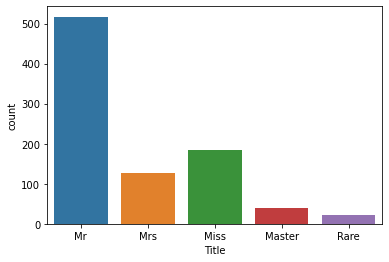

In [45]:
sb.countplot(x='Title',data=data)

In [46]:
data['Title'] = data['Title'].fillna(0)
data = data.drop(['Name'], axis=1)

In [47]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
Deck          int32
Title        object
dtype: object

In [48]:
data["Age"] = data["Age"].astype(int)

In [49]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age           int32
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
Deck          int32
Title        object
dtype: object

In [50]:
data["Family"] = data['SibSp'] + data['Parch']
data["IsAlone"] = np.where(data["Family"] > 0, 0,1)


We will create a feature IsAlone which depends on the number of family members that can be calculated from the Parch and SibSp columns.

In [51]:
data['AgeBands'] = pd.qcut(data['Age'],4,labels=False) 
 

In [52]:
data['FareBands'] = pd.qcut(data['Fare'],7,labels=False) 

Creating Bands for Age and Fare columns as they have continuous data and there might be fluctuations that do not reflect patterns in the data, which might be noise.

In [53]:
data.dtypes

Survived       int64
Pclass         int64
Sex           object
Age            int32
SibSp          int64
Parch          int64
Fare         float64
Embarked      object
Deck           int32
Title         object
Family         int64
IsAlone        int32
AgeBands       int64
FareBands      int64
dtype: object

In [54]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

for i in data.columns:
    if data[i].dtype=='object':
        data[i]=encode.fit_transform(data[i].values.reshape(-1,1))


In [57]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(X))
threshold=3

print(np.where(z>3))

(array([339], dtype=int64), array([3], dtype=int64))


In [58]:
X = data.drop(["Survived","SibSp","Parch","Fare","Family","Age"], axis=1)
Y = data["Survived"]

In [59]:
Y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [60]:
from sklearn.preprocessing import power_transform
X=power_transform(X,method='yeo-johnson')

In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [62]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X,Y=sm.fit_resample(X,Y)
Y.value_counts()

0    549
1    549
Name: Survived, dtype: int64

Dropping unwanted columns after data cleaning ,some  processing and visualizations. Now our data is ready for training and testing.

Data Training on Various Models

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=2)

1.SGD(Stochastic Gradient Descent) Classifier

In [65]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)

sgd.fit(X_train, y_train)

Y_pred = sgd.predict(X_train)#training prediction
Y_pred1 = sgd.predict(X_test)#test prediction
acc_sgd=accuracy_score(y_train,Y_pred)
print("Accuracy Training: ",accuracy_score(y_train,Y_pred))
print("Accuracy Test: ",accuracy_score(y_test,Y_pred1))

Accuracy Training:  0.6583143507972665
Accuracy Test:  0.7272727272727273


2.Random Forest Classifier

In [66]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

Y_pred = rfc.predict(X_train)#training prediction
Y_pred1 = rfc.predict(X_test)#test prediction
acc_random_forest=accuracy_score(y_train,Y_pred)
print("Accuracy Training: ",accuracy_score(y_train,Y_pred))
print("Accuracy Test: ",accuracy_score(y_test,Y_pred1))


Accuracy Training:  0.9134396355353075
Accuracy Test:  0.8727272727272727


3.Logistic Regression

In [67]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

Y_pred = lr.predict(X_train)#training prediction
Y_pred1 = lr.predict(X_test)#test prediction
acc_log =accuracy_score(y_train,Y_pred)
print("Accuracy Training: ",accuracy_score(y_train,Y_pred))
print("Accuracy Test: ",accuracy_score(y_test,Y_pred1))

Accuracy Training:  0.7630979498861048
Accuracy Test:  0.7954545454545454


4.K Nearest Neighbors Classifier

In [68]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)  

Y_pred = knn.predict(X_train)#training prediction
Y_pred1 = knn.predict(X_test)#test prediction
acc_knn =accuracy_score(y_train,Y_pred)
print("Accuracy Training: ",accuracy_score(y_train,Y_pred))
print("Accuracy Test: ",accuracy_score(y_test,Y_pred1))

Accuracy Training:  0.8621867881548975
Accuracy Test:  0.8090909090909091


5.Gaussian Naive Bayes

In [69]:
gauss = GaussianNB() 
gauss.fit(X_train, y_train)  

Y_pred = gauss.predict(X_train)#training prediction
Y_pred1 = gauss.predict(X_test)#test prediction
acc_gaussian =accuracy_score(y_train,Y_pred)
print("Accuracy Training: ",accuracy_score(y_train,Y_pred))
print("Accuracy Test: ",accuracy_score(y_test,Y_pred1))

Accuracy Training:  0.7494305239179955
Accuracy Test:  0.8136363636363636


6.Perceptron

In [70]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, y_train)

Y_pred = perceptron.predict(X_train)#training prediction
Y_pred1 = perceptron.predict(X_test)#test prediction
acc_perceptron =accuracy_score(y_train,Y_pred)
print("Accuracy Training: ",accuracy_score(y_train,Y_pred))
print("Accuracy Test: ",accuracy_score(y_test,Y_pred1))

Accuracy Training:  0.7608200455580866
Accuracy Test:  0.759090909090909


7.Linear Support Vector Machine

In [71]:
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)

Y_pred = lsvc.predict(X_train)#training prediction
Y_pred1 = lsvc.predict(X_test)#test prediction
acc_linear_svc =accuracy_score(y_train,Y_pred)
print("Accuracy Training: ",accuracy_score(y_train,Y_pred))
print("Accuracy Test: ",accuracy_score(y_test,Y_pred1))

Accuracy Training:  0.7642369020501139
Accuracy Test:  0.7954545454545454


8.Decision Tree Classifier

In [72]:
dtree = DecisionTreeClassifier() 
dtree.fit(X_train, y_train) 

Y_pred = dtree.predict(X_train)#training prediction
Y_pred1 = dtree.predict(X_test)#test prediction
acc_decision_tree =accuracy_score(y_train,Y_pred)
print("Accuracy Training: ",accuracy_score(y_train,Y_pred))
print("Accuracy Test: ",accuracy_score(y_test,Y_pred1))

Accuracy Training:  0.9134396355353075
Accuracy Test:  0.8681818181818182


In [73]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc*100, acc_knn*100, acc_log*100, 
              acc_random_forest*100, acc_gaussian*100, acc_perceptron*100, 
              acc_sgd*100, acc_decision_tree*100]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
91.343964,Random Forest
91.343964,Decision Tree
86.218679,KNN
76.423690,Support Vector Machines
76.309795,Logistic Regression
76.082005,Perceptron
74.943052,Naive Bayes
65.831435,Stochastic Gradient Decent


Performance of models.

In [74]:
from sklearn.model_selection import cross_val_score
rfc = RandomForestClassifier()
scores = cross_val_score(rfc, X, Y, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", (scores.mean()*100))
print("Standard Deviation:", scores.std())

Scores: [0.79090909 0.76363636 0.85454545 0.8        0.79090909 0.80909091
 0.90909091 0.8        0.83486239 0.88073394]
Mean: 82.33778148457047
Standard Deviation: 0.04326016007860829


FRom K-Score we get that our model has a average accuracy of almost 82% with a standard deviation of 4 %. The standard deviation shows us, how precise the estimates are .

 Random forest make it very easy to measure the relative importance of each feature.

In [75]:
#X  = X.drop("IsAlone", axis=1)#not having much contribution
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=2)

random_forest = RandomForestClassifier(n_estimators=400, oob_score = True)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

91.34 %


In [76]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 81.21000000000001 %


In [77]:
param_grid = { "criterion" : ["gini", "entropy","log_loss"], 
              "min_samples_leaf" : [1, 5, 10],
              "min_samples_split" : [2, 4, 10, 12]}

from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier()

clf = GridSearchCV(rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, y_train)
#clf.bestparams
clf.best_params_

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 10}

In [78]:
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True,random_state=1,n_jobs=-1) 

random_forest.fit(X_train, y_train)
                                       
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 82.0 %


In [79]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, y_train, cv=10)
confusion_matrix(y_train, predictions)

array([[386,  61],
       [ 99, 332]], dtype=int64)

In [80]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions)*100)
print("Recall:",recall_score(y_train, predictions)*100)

Precision: 84.47837150127226
Recall: 77.03016241299304


In [81]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.8058252427184466

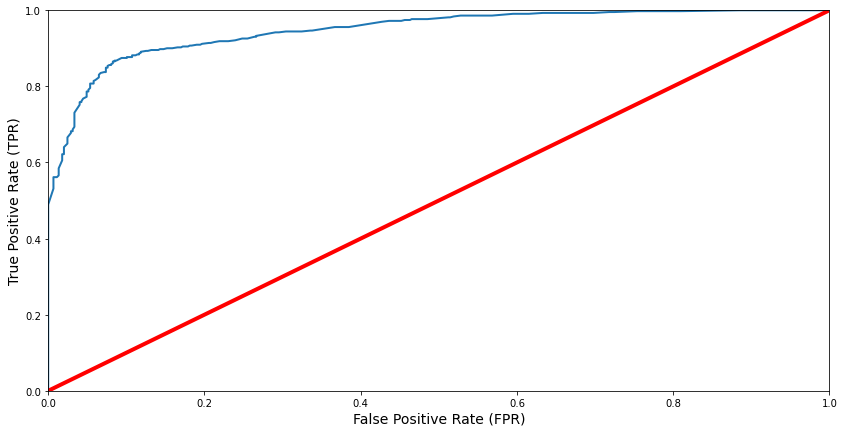

In [82]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)
# plotting them against each other

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    pplot.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    pplot.plot([0, 1], [0, 1], 'r', linewidth=4)
    pplot.axis([0, 1, 0, 1])
    pplot.xlabel('False Positive Rate (FPR)', fontsize=14)
    pplot.ylabel('True Positive Rate (TPR)', fontsize=14)

pplot.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
pplot.show()

In [83]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score*100)

ROC-AUC-Score: 94.6952355741032


The red line in the ROC curve represents a pure random classifier and the classifier should be as far away from it as possible. 

Our Random Forest model seems to do a good job.

Of course we also have a tradeoff here, because the classifier produces more false positives.

Our ROC-AUC-Score is almost 93% precent accurate.

Here we do Hyper parameter tuning of one model that performs 2nd best.

In [84]:
param_grid = { "criterion" : ["gini", "entropy","log_loss"],"splitter":['best', 'random'], 
              "min_samples_leaf" : [1, 5, 10],
              "min_samples_split" : [2, 4, 10, 12]}

from sklearn.model_selection import GridSearchCV, cross_val_score
dtc = DecisionTreeClassifier()

clf1 = GridSearchCV(dtc, param_grid=param_grid, n_jobs=-1)
clf1.fit(X_train, y_train)

clf1.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'splitter': 'best'}

In [85]:
dt = DecisionTreeClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,
                                       splitter="best",
                                       max_features='auto', 
                                       random_state=1) 
                                       

dt.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

score=dt.score(X_train, y_train)

print("Accuracy Score:",score*100)
cv_score = cross_val_score(dt, X, Y, cv=10, scoring = "accuracy")
print("Cross Value Scores:", cv_score)
print("Mean:", cv_score.mean()*100)
print("Standard Deviation:", cv_score.std())

Accuracy Score: 86.90205011389521
Cross Value Scores: [0.78181818 0.70909091 0.84545455 0.77272727 0.8        0.81818182
 0.9        0.81818182 0.86238532 0.87155963]
Mean: 81.79399499582985
Standard Deviation: 0.052782958448077816


In [86]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(dt, X_train, y_train, cv=10)
confusion_matrix(y_train, predictions)

array([[380,  67],
       [108, 323]], dtype=int64)

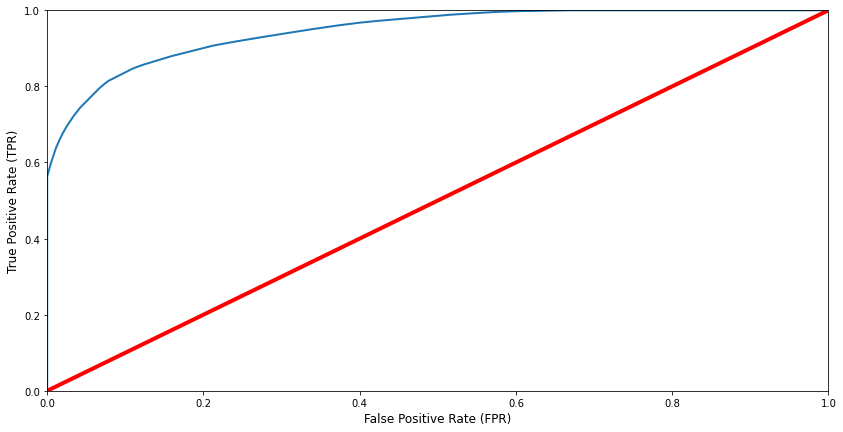

In [87]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
y_scores1 = dt.predict_proba(X_train)
y_scores1 = y_scores1[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores1)
# plotting them against each other

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    pplot.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    pplot.plot([0, 1], [0, 1], 'r', linewidth=4)
    pplot.axis([0, 1, 0, 1])
    pplot.xlabel('False Positive Rate (FPR)', fontsize=12)
    pplot.ylabel('True Positive Rate (TPR)', fontsize=12)

pplot.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
pplot.show()

In [88]:
from sklearn.metrics import roc_auc_score
r_score = roc_auc_score(y_train, y_scores1)
print("ROC-AUC-Score:", r_score*100)

ROC-AUC-Score: 94.59194319438173


In [89]:
#Submission of Model

y_final = clf.predict(X)

submission = pd.DataFrame({
        "Survived Original": Y,
        "Survived Predicted": y_final
    })
submission.head(15)
submission.to_csv('titanic_survival.csv', index=False)

In [90]:
submission.head(15)

,Survived Original,Survived Predicted
0,0,0
1,1,1
2,1,0
3,1,1
4,0,0
5,0,0
6,0,0
7,0,1
8,1,1
9,1,1


In [92]:
import pickle
filename="TitaticSurvival.pkl"
pickle.dump(clf,open(filename,'wb'))

Conclusion:
    
From Data we see that men have a high probability of survival when they are between 18 and 30 years old, which is also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40.

For men the probability of survival is very low between the age of 5 and 18, but that isn’t true for women. Another thing to note is that infants also have a little bit higher probability of survival.

Since there seem to be certain ages, which have increased odds of survival and to keep everything on the same scale, we create groups.


Embarked seems to be correlated with survival, depending on the gender.

Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port C. Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.

Pclass also seems to be correlated with survival.

Pclass is contributing to a persons chance of survival, especially if this person is in class 1.

It shows that childrens , womens and class wise priority was taken at the time of incident.

SibSp and Parch would make more sense as a combined feature, that shows the total number of relatives, a person has on the ship.

There a high probabilty of survival with 1 to 3 realitves, but a lower one if you had less than 1 or more than 3.It shows that singles and complete families(as per assumptions) were given less priority.

Instead of dropping Cabin and Name we create a new feature, that contains a persons deck and Titles.

Age and Fare columns have continuous data and there might be fluctuations that do not reflect patterns in the data, which might be noise. That's why wel put people that are within a certain range of age or fare in the same bin. This can be achieved using qcut method.

We train 8 Machine Learning models and compare their results and cross validate their performance.

The performance and accuracy of Random forest and Decision Tree is almost same.

We HyperTuned them, used confusion matrix,f1-score,ROC AUC Curve to validate performances and finally submitted Random forest which has ROC_AUC_SCORE of almost 95%.